# Lesson 5 Practical Application
## C2C Jordan Armstrong
### Documentation: None.

In [11]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Question 1:
The tips.csv dataset contains data on tips collected from a restaurant.

    a) Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.
    
    b) Repeat part a, but broken down by time.

In [12]:
tips=Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


Part A:

In [13]:
tips.select('tip','sex').groups('sex',np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


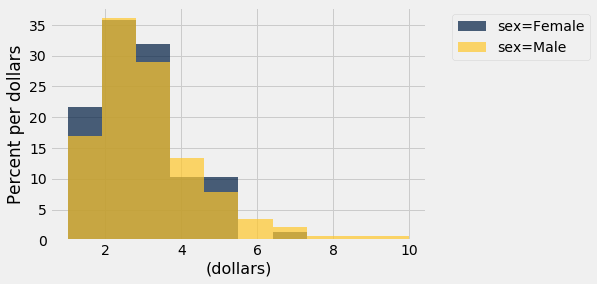

In [14]:
tips.hist('tip',unit="dollars",group='sex')

Part B:

In [15]:
tips.select('time','tip').group('time',np.mean)

time,tip mean
Dinner,3.10267
Lunch,2.72809


E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


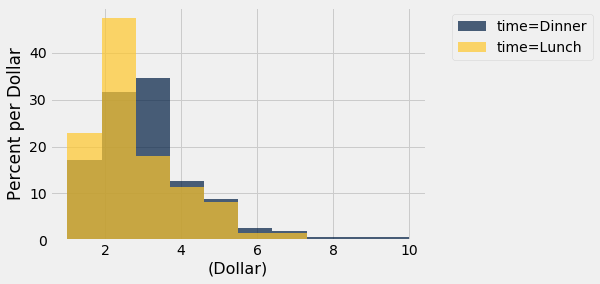

In [17]:
tips.hist('tip',unit="Dollar",group='time')

Question 2:
Create a function called weekday_to_num. This function inputs a string denoting day of the week(Mon., Tues., Wed, Thurs, Fri, Sat, Sun), and returns a number (Mon=1, Tues=2,...Sun=7).

In [26]:
def weekday_to_num(string):
    days=["Mon","Tues","Wed","Thur","Fri","Sat","Sun"]
    return days.index(string)+1

In [22]:
weekday_to_num("Tues")

2

In [23]:
weekday_to_num("Fri")

5

Question 3:
Apply this function to the day column of tips and include the result as a new colulmn in tips, called weekday_num.

In [27]:
tips.with_column('weekday_num',tips.apply(weekday_to_num,'day'))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


Question 4:
Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of $20$, we will simply look at all total bills near $20$ and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of  $1$, we will look at all bills totaling $19$ thru $21$. The output of this function will be the predicted tip amount.

In [30]:
def est_tip(bill,window):
    range = tips.where("total_bill",are.between((bill-window),(bill+window)))
    tip_range = range.column("tip")
    return np.mean(tip_range)

Question 5: Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount.

In [31]:
tips=tips.with_column('estimated_tip',tips.apply(lambda x: est_tip(x,10),"total_bill"))

In [37]:
tips_with_estimate=tips.select("total_bill","estimated_tip","tip")
tips_with_estimate

total_bill,estimated_tip,tip
16.99,2.69279,1.01
10.34,2.39717,1.66
21.01,2.92876,3.5
23.68,3.17346,3.31
24.59,3.24286,3.61
25.29,3.3137,4.71
8.77,2.35281,2
26.88,3.48058,3.12
15.04,2.62133,1.96
14.78,2.61529,3.23


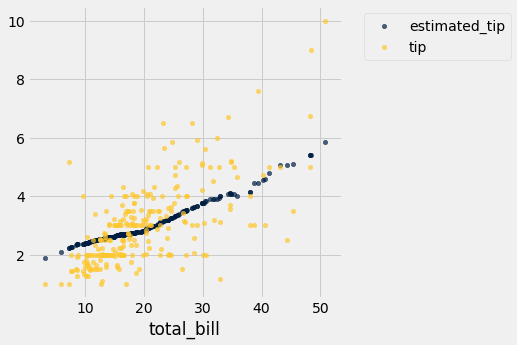

In [38]:
tips_with_estimate.scatter("total_bill")